# Climate Change

### Is there a correlation between yearly global average temperature and yearly average global CO2 level ?
* Null hypothesis: There is no correlation between yearly global average temp and yearly average global CO2 levels
* Alternative hypothesis: There is a positive correlation between yearly global average temp and yearly average global CO2 levels

In [140]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [141]:
# Read in the files World bank dataset
file_basic_path="data_sets/"
newFile = pd.ExcelFile("data_sets/climate_change_data.xls")
climchang_df = pd.read_excel("data_sets/climate_change_data.xls", sheet_name="Data")


In [142]:
# Create df
climchang_df.columns
co2_df=climchang_df[climchang_df['Series name']=='CO2 emissions per capita (metric tons)'].copy()
co2_df
co2_df.drop(['Country code', 'Series code','Series name','SCALE','Decimals',2009,2010,2011], axis=1, inplace = True)
co2_df

,Country name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
1864,Aruba,29.6206,29.8388,25.2393,24.4052,22.9779,22.2331,21.8071,21.7451,19.2162,19.0726,24.7389,24.2182,23.8404,23.2795,22.8063,22.5112,22.1353,22.623,21.6838
1865,Andorra,..,..,..,..,..,6.29124,6.52141,7.06224,7.53423,8.02344,8.11308,7.89849,7.70122,7.41496,7.50037,7.39163,6.84056,6.62304,6.52783
1866,Afghanistan,0.140715,0.126777,0.0701453,0.0654029,0.0607274,0.0564514,0.0518392,0.046827,0.043105,0.0330121,0.0300981,0.0241743,0.0130843,0.0206349,0.0242207,0.0234208,0.0226567,0.0226127,0.0250348
1867,Angola,0.428613,0.409949,0.401597,0.510141,0.331321,0.909699,0.842489,0.577043,0.556263,0.677678,0.685141,0.676401,0.850599,0.587864,1.17772,1.16177,1.30897,1.43517,1.35109
1868,Albania,2.27635,1.20648,0.73071,0.7266,0.606661,0.664265,0.647964,0.499307,0.569277,0.973817,0.98603,1.0498,1.21411,1.38101,1.28145,1.46479,1.34059,1.41374,1.31286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,"Yemen, Rep.",-0.251051,0.806199,1.09035,0.680109,0.782346,0.742687,0.9507,0.953645,0.729809,0.807407,0.825961,0.889748,0.837117,0.891083,0.942838,0.970709,0.976692,1.00134,1.03349
2093,South Africa,9.47482,9.63839,8.85379,9.14103,9.37564,9.03524,8.96594,9.07314,8.88357,8.64409,8.37751,8.07716,7.63588,8.25758,8.87534,8.64857,8.49993,8.98017,8.9332
2094,"Congo, Dem. Rep.",0.111804,0.0991913,0.0917591,0.0830127,0.0581214,0.0673197,0.0717289,0.0631078,0.0534875,0.046415,0.0331777,0.0307085,0.0294107,0.031384,0.040909,0.041255,0.041642,0.0419967,0.0450782
2095,Zambia,0.31118,0.299524,0.296995,0.29497,0.278423,0.243385,0.204124,0.25386,0.238986,0.181781,0.17829,0.182476,0.184148,0.192096,0.188389,0.197069,0.194427,0.14266,0.15255


In [143]:
#change column name
co2_df.rename(columns = {"Country name":"Country"}, inplace=True)
co2_df

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
1864,Aruba,29.6206,29.8388,25.2393,24.4052,22.9779,22.2331,21.8071,21.7451,19.2162,19.0726,24.7389,24.2182,23.8404,23.2795,22.8063,22.5112,22.1353,22.623,21.6838
1865,Andorra,..,..,..,..,..,6.29124,6.52141,7.06224,7.53423,8.02344,8.11308,7.89849,7.70122,7.41496,7.50037,7.39163,6.84056,6.62304,6.52783
1866,Afghanistan,0.140715,0.126777,0.0701453,0.0654029,0.0607274,0.0564514,0.0518392,0.046827,0.043105,0.0330121,0.0300981,0.0241743,0.0130843,0.0206349,0.0242207,0.0234208,0.0226567,0.0226127,0.0250348
1867,Angola,0.428613,0.409949,0.401597,0.510141,0.331321,0.909699,0.842489,0.577043,0.556263,0.677678,0.685141,0.676401,0.850599,0.587864,1.17772,1.16177,1.30897,1.43517,1.35109
1868,Albania,2.27635,1.20648,0.73071,0.7266,0.606661,0.664265,0.647964,0.499307,0.569277,0.973817,0.98603,1.0498,1.21411,1.38101,1.28145,1.46479,1.34059,1.41374,1.31286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,"Yemen, Rep.",-0.251051,0.806199,1.09035,0.680109,0.782346,0.742687,0.9507,0.953645,0.729809,0.807407,0.825961,0.889748,0.837117,0.891083,0.942838,0.970709,0.976692,1.00134,1.03349
2093,South Africa,9.47482,9.63839,8.85379,9.14103,9.37564,9.03524,8.96594,9.07314,8.88357,8.64409,8.37751,8.07716,7.63588,8.25758,8.87534,8.64857,8.49993,8.98017,8.9332
2094,"Congo, Dem. Rep.",0.111804,0.0991913,0.0917591,0.0830127,0.0581214,0.0673197,0.0717289,0.0631078,0.0534875,0.046415,0.0331777,0.0307085,0.0294107,0.031384,0.040909,0.041255,0.041642,0.0419967,0.0450782
2095,Zambia,0.31118,0.299524,0.296995,0.29497,0.278423,0.243385,0.204124,0.25386,0.238986,0.181781,0.17829,0.182476,0.184148,0.192096,0.188389,0.197069,0.194427,0.14266,0.15255


### If there is a correlation between an increase in global temperature and CO2 levels, then is there a relationship between a country’s average temperature and their CO2 level? Can we see a local effect on a country’s temperature from their CO2 levels?
* Null Hypothesis: A country’s increase in CO2 level does not increase the country’s average temperature (by year)
* Alternative Hypothesis: A country’s increase in CO2 level does increase the country’s average temperature.

In [144]:
# SET UP TEMPERATURE DATAFRAME

In [145]:
# Import data from dataset temperatures by country
df_temp = pd.read_csv("data_sets/GlobalLandTemperaturesByCountry.csv")
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [146]:
np.dtype(df_temp["dt"])

dtype('O')

In [147]:
# Drop NaN values
df_temp.dropna(how = "any", inplace = True)
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [148]:
# Retrieving first value in list of values separated by hyphen
splited_series = df_temp['dt'].str.split('-').str[0]
splited_series

0         1743
5         1744
6         1744
7         1744
8         1744
          ... 
577456    2013
577457    2013
577458    2013
577459    2013
577460    2013
Name: dt, Length: 544811, dtype: object

In [149]:
# Adding as new series and check whether new column for year is added
df_temp["Year"] = splited_series.astype("int64")
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [150]:
#check data type
print(np.dtype(df_temp["Year"]))

int64


In [151]:
# Drop dt column
df_temp.drop(["dt"], axis=1, inplace=True)
df_temp.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,4.384,2.294,Åland,1743
5,1.530,4.680,Åland,1744
6,6.702,1.789,Åland,1744
7,11.609,1.577,Åland,1744
8,15.342,1.410,Åland,1744


In [152]:
# Drop Uncertainty column
df_temp.drop(["AverageTemperatureUncertainty"], axis=1, inplace=True)
df_temp.head()

,AverageTemperature,Country,Year
0,4.384,Åland,1743
5,1.530,Åland,1744
6,6.702,Åland,1744
7,11.609,Åland,1744
8,15.342,Åland,1744


In [183]:
# Print df for 1990-2008
pivot = df_temp.pivot_table(index="Country", columns="Year", values="AverageTemperature")
pivot = pivot.iloc[:,243:262]
pivot

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,14.993333,14.370750,14.056083,14.439250,14.754750,14.859167,14.426000,14.904000,15.132500,15.388750,15.497833,15.778083,15.537667,14.916000,15.770917,14.980000,15.595583,15.106167,15.216500
Africa,24.703750,24.422250,24.335417,24.538667,24.438750,24.718417,24.634500,24.706833,25.020500,24.743750,24.588083,24.841167,24.961333,25.025583,24.895917,25.156167,24.818917,24.851500,24.754667
Albania,13.468667,12.338833,13.084667,13.122583,14.099667,12.782083,12.736500,12.900917,13.311250,13.653750,13.746583,13.690417,13.559917,13.626583,13.258167,12.747083,12.976917,13.890500,13.955167
Algeria,24.014417,23.011083,22.767000,23.450833,23.642083,23.722500,23.734333,23.955167,23.920583,24.299417,24.032250,24.724417,24.263000,24.393667,23.916000,24.222583,24.200833,24.065333,23.950250
American Samoa,27.156250,27.171167,27.072000,26.816417,26.986333,27.268667,27.112667,26.955750,27.424833,27.067167,27.219833,27.227583,27.537917,27.264833,27.281167,27.373500,27.081250,27.452417,26.995083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,23.401917,22.640333,22.734500,22.301917,22.944500,23.371083,23.262250,23.643333,23.690167,22.836250,23.020083,23.704917,23.457833,23.408917,23.420667,23.507667,23.441833,23.145417,23.323083
Yemen,26.640667,26.594417,26.266500,26.402000,26.994250,26.577667,26.546167,26.940000,27.368667,27.353583,27.436167,27.068917,27.125167,27.357750,27.334083,27.294667,27.175000,27.310750,26.807500
Zambia,22.219333,21.628917,22.414667,21.711583,21.846583,22.451417,22.018083,21.949750,22.300667,21.451750,21.558750,21.802417,22.292417,22.156750,21.768083,22.813500,21.784250,21.838500,21.535833


In [189]:
# merge co2 and temp DFs
df = pivot.merge(co2_df, how="inner", on="Country", suffixes=("_temp","_CO2"))
df.head()

,Country,1990_temp,1991_temp,1992_temp,1993_temp,1994_temp,1995_temp,1996_temp,1997_temp,1998_temp,...,1999_CO2,2000_CO2,2001_CO2,2002_CO2,2003_CO2,2004_CO2,2005_CO2,2006_CO2,2007_CO2,2008_CO2
0,Afghanistan,14.993333,14.370750,14.056083,14.439250,14.754750,14.859167,14.426000,14.904000,15.132500,...,0.0330121,0.0300981,0.0241743,0.0130843,0.0206349,0.0242207,0.0234208,0.0226567,0.0226127,0.0250348
1,Albania,13.468667,12.338833,13.084667,13.122583,14.099667,12.782083,12.736500,12.900917,13.311250,...,0.973817,0.98603,1.0498,1.21411,1.38101,1.28145,1.46479,1.34059,1.41374,1.31286
2,Algeria,24.014417,23.011083,22.767000,23.450833,23.642083,23.722500,23.734333,23.955167,23.920583,...,3.06052,2.87979,2.7207,2.88958,2.8995,2.76247,3.25731,3.21346,3.32507,3.23296
3,American Samoa,27.156250,27.171167,27.072000,26.816417,26.986333,27.268667,27.112667,26.955750,27.424833,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,12.455583,11.565417,11.498417,11.432167,12.632250,12.376417,11.741417,12.896167,12.118750,...,8.02344,8.11308,7.89849,7.70122,7.41496,7.50037,7.39163,6.84056,6.62304,6.52783


In [190]:
# Add column for region and check whether column has been added
df["Region"] = ""

# Create DF with data regions
region_df = pd.read_excel("data_sets/climate_change_data.xls", sheet_name="Country")

# rename column to make suitable for merge
region_df.rename(columns = {"Country name": "Country"}, inplace=True)

# Populate Region column through a merge and rename column
df_final = df.merge(region_df,how="inner", on="Country")
df_final = pd.merge(df, region_df, on='Country')
df_final.drop(["Region_x", "Country code", "Capital city", "Income group", "Lending category"],axis=1, inplace=True)
df_final.rename(columns = {"Region_y": "Region"}, inplace=True)
df_final.head()

,Country,1990_temp,1991_temp,1992_temp,1993_temp,1994_temp,1995_temp,1996_temp,1997_temp,1998_temp,...,2000_CO2,2001_CO2,2002_CO2,2003_CO2,2004_CO2,2005_CO2,2006_CO2,2007_CO2,2008_CO2,Region
0,Afghanistan,14.993333,14.370750,14.056083,14.439250,14.754750,14.859167,14.426000,14.904000,15.132500,...,0.0300981,0.0241743,0.0130843,0.0206349,0.0242207,0.0234208,0.0226567,0.0226127,0.0250348,South Asia
1,Albania,13.468667,12.338833,13.084667,13.122583,14.099667,12.782083,12.736500,12.900917,13.311250,...,0.98603,1.0498,1.21411,1.38101,1.28145,1.46479,1.34059,1.41374,1.31286,Europe & Central Asia
2,Algeria,24.014417,23.011083,22.767000,23.450833,23.642083,23.722500,23.734333,23.955167,23.920583,...,2.87979,2.7207,2.88958,2.8995,2.76247,3.25731,3.21346,3.32507,3.23296,Middle East & North Africa
3,American Samoa,27.156250,27.171167,27.072000,26.816417,26.986333,27.268667,27.112667,26.955750,27.424833,...,..,..,..,..,..,..,..,..,..,East Asia & Pacific
4,Andorra,12.455583,11.565417,11.498417,11.432167,12.632250,12.376417,11.741417,12.896167,12.118750,...,8.11308,7.89849,7.70122,7.41496,7.50037,7.39163,6.84056,6.62304,6.52783,Europe & Central Asia


In [236]:
# Clean NAN value from merged dataframe 
df_final.dropna(inplace=True)

# Clean druplicated coutnry from merged dataframe 
df_final.drop_duplicates(subset=['Region'],inplace=True)

In [237]:
# Transfer "Region" column to a list of regions
region=df_final["Region"].tolist()
print(region)

['South Asia', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific', 'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America']


In [238]:
# Create two dictionaries of CO2 and Life expectancy.
# Keys are country names and values are list of CO2/Life expectancy data
co2_dict={}
temp_dict={}

In [239]:

# Loop every region in the region list
for x in region:
    # Add the key (region) to the dictionary
    co2_dict[x]=[]
    temp_dict[x]=[]
    # Loop every year from 1990 to 2008
    for y in range(1990,2008):
        # Add the value to the correponding country.
        co2_dict[x].append(df_final[f"{y}_CO2"][df_final["Region"]==x].values[0])
        temp_dict[x].append(df_final[f"{y}_temp"][df_final["Region"]==x].values[0])

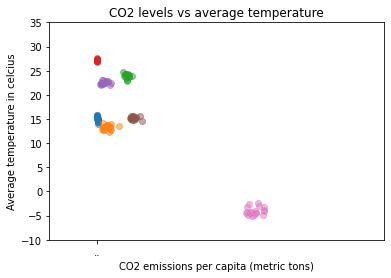

In [263]:
# Loop every region in the country list
co2=[]
temp=[]
for x in region:
    for y in co2_dict[x]:
        co2.append(y)
    for y in temp_dict[x]:
        temp.append(y)
    # Plot the CO2/temp expectancy data of each region
    plt.scatter(co2_dict[x], temp_dict[x], alpha=0.5)

#plt.scatter(co2, lf, alpha=0.5, facecolors='none', edgecolors='blue')

# Set up the figure
plt.xlim(-5,30)
plt.ylim(-10,35)
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel("Average temperature in celcius")
plt.title("CO2 levels vs average temperature")
plt.savefig("CO2_vs_avg_temp_all_regions.png")
plt.show()

Text(0.5, 1.0, 'Average temperature in celsius vs CO2 emissions')

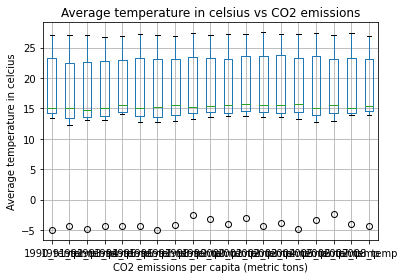

In [193]:
# print list of regions
list(df_final["Region"].unique())

['South Asia',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'East Asia & Pacific',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'North America']

In [199]:
# Create DFs by region
sa = df_final[df_final["Region"]=="South Asia"]
eca = df_final[df_final["Region"]=="Europe & Central Asia"]
mena = df_final[df_final["Region"]=="Middle East & North Africa"]
eap = df_final[df_final["Region"]=="East Asia & Pacific"]
ssa = df_final[df_final["Region"]=="Sub-Saharan Africa"]
lac = df_final[df_final["Region"]=="Latin America & Caribbean"]
na = df_final[df_final["Region"]=="North America"]

In [214]:
# Charts South Asia
sa

,Country,1990_temp,1991_temp,1992_temp,1993_temp,1994_temp,1995_temp,1996_temp,1997_temp,1998_temp,...,2000_CO2,2001_CO2,2002_CO2,2003_CO2,2004_CO2,2005_CO2,2006_CO2,2007_CO2,2008_CO2,Region
0,Afghanistan,14.993333,14.370750,14.056083,14.439250,14.754750,14.859167,14.426000,14.904000,15.132500,...,0.0300981,0.0241743,0.0130843,0.0206349,0.0242207,0.0234208,0.0226567,0.0226127,0.0250348,South Asia
13,Bangladesh,25.281750,25.135167,25.122250,25.003167,25.261667,25.415833,25.440250,24.859250,25.524167,...,0.215025,0.245931,0.250991,0.247771,0.286624,0.267824,0.327665,0.326002,0.31982,South Asia
19,Bhutan,12.205583,11.994667,11.826833,12.087750,12.299667,12.428417,12.374667,11.578833,12.589833,...,0.699684,0.704653,0.847128,0.745813,0.73066,1.03454,0.625044,0.84142,1.04568,South Asia
71,India,24.178167,24.311750,24.222917,24.408667,24.296417,24.429750,24.436917,24.047333,24.755417,...,1.16806,1.16598,1.16989,1.20435,1.24717,1.28919,1.35551,1.4335,1.52873,South Asia
108,Nepal,15.272333,15.135000,15.075583,15.276250,15.458250,15.453333,15.459833,14.691917,15.577750,...,0.13255,0.138282,0.106011,0.112913,0.103623,0.118551,0.119494,0.12058,0.122549,South Asia
119,Pakistan,21.376417,20.901333,20.708500,21.444833,21.163083,21.073917,20.933833,20.738750,21.662750,...,0.736561,0.733833,0.758501,0.776383,0.844473,0.861267,0.903052,0.978331,0.974532,South Asia
145,Sri Lanka,27.528750,27.560000,27.269833,27.367417,27.365250,27.587500,27.399583,27.657667,28.153250,...,0.542076,0.541471,0.575326,0.550338,0.610151,0.586756,0.58527,0.60742,0.574575,South Asia


In [253]:
sa_sum = sa.describe(include='all')
print(sa_sum)

       Country  1990_temp  1991_temp  1992_temp  1993_temp  1994_temp  \
count        7   7.000000   7.000000   7.000000   7.000000   7.000000   
unique       7        NaN        NaN        NaN        NaN        NaN   
top     Bhutan        NaN        NaN        NaN        NaN        NaN   
freq         1        NaN        NaN        NaN        NaN        NaN   
mean       NaN  20.119476  19.915524  19.754571  20.003905  20.085583   
std        NaN   5.944200   6.087134   6.101666   6.009350   5.903784   
min        NaN  12.205583  11.994667  11.826833  12.087750  12.299667   
25%        NaN  15.132833  14.752875  14.565833  14.857750  15.106500   
50%        NaN  21.376417  20.901333  20.708500  21.444833  21.163083   
75%        NaN  24.729958  24.723458  24.672583  24.705917  24.779042   
max        NaN  27.528750  27.560000  27.269833  27.367417  27.365250   

        1995_temp  1996_temp  1997_temp  1998_temp  ...  2000_CO2  2001_CO2  \
count    7.000000   7.000000   7.000000   7.

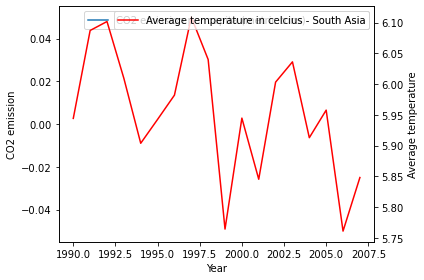

In [261]:
sa_sum = sa.describe(include='all')
#print(sa_sum)
co2_mean=[]
temp_mean=[]
for y in range(1990,2008):
    co2_mean.append(sa_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(sa_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

year=[x for x in range(1990,2008)]
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- South Asia")
ax1.legend(loc="best")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - South Asia")
ax2.tick_params(axis='y')

ax2.legend(loc="best")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("CO2_vs_avg_temp_SA.png")
plt.show()

Text(0.5, 1.0, 'Average temperature in celsius vs CO2 emissions - South Asia')

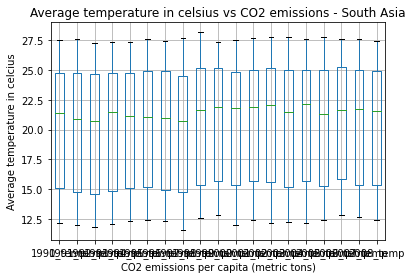

In [286]:
# Box plot
sa.boxplot()
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Boxplot_temp_co2_SA.png')
plt.title('Average temperature in celsius vs CO2 emissions - South Asia')

In [ ]:
# Europe & Central Asia

In [262]:
eca

,Country,1990_temp,1991_temp,1992_temp,1993_temp,1994_temp,1995_temp,1996_temp,1997_temp,1998_temp,...,2000_CO2,2001_CO2,2002_CO2,2003_CO2,2004_CO2,2005_CO2,2006_CO2,2007_CO2,2008_CO2,Region
1,Albania,13.468667,12.338833,13.084667,13.122583,14.099667,12.782083,12.736500,12.900917,13.311250,...,0.98603,1.0498,1.21411,1.38101,1.28145,1.46479,1.34059,1.41374,1.31286,Europe & Central Asia
4,Andorra,12.455583,11.565417,11.498417,11.432167,12.632250,12.376417,11.741417,12.896167,12.118750,...,8.11308,7.89849,7.70122,7.41496,7.50037,7.39163,6.84056,6.62304,6.52783,Europe & Central Asia
7,Armenia,9.258083,9.372583,7.614667,7.769667,9.021250,9.892167,9.819167,9.246333,10.448417,...,1.12653,1.15543,0.98112,1.12027,1.19016,1.4185,1.42626,1.64492,1.80189,Europe & Central Asia
10,Austria,7.344000,6.357917,7.615583,6.858667,8.164917,6.846500,5.863250,7.025083,7.222750,...,7.71247,7.9121,8.0556,8.90844,8.82221,9.03466,8.70835,8.28928,8.1236,Europe & Central Asia
11,Azerbaijan,11.992000,11.956000,10.721333,10.526083,11.472917,12.731583,12.202250,11.894417,12.958750,...,3.79524,3.62941,3.67198,3.78455,3.88403,4.11015,4.63402,4.92192,5.37911,Europe & Central Asia
15,Belarus,7.757417,6.895417,7.132000,6.013833,6.735917,7.021250,5.656583,6.343750,6.528333,...,5.34418,5.27527,5.27863,5.44073,5.92612,6.03977,6.35061,6.21069,6.54194,Europe & Central Asia
16,Belgium,10.935333,9.709167,10.489250,9.925833,10.996750,10.696750,8.893167,10.472417,10.369167,...,11.2868,11.1564,10.4066,11.0673,10.6785,10.2224,10.1267,9.64918,9.79273,Europe & Central Asia
23,Bulgaria,11.597667,10.180667,11.021750,10.713417,12.200417,10.809667,10.428500,10.225333,11.098917,...,5.40086,5.87276,5.67222,6.04729,6.01289,6.18992,6.3571,6.89475,6.62941,Europe & Central Asia
38,Croatia,12.434417,11.333250,12.549083,11.931583,13.110000,11.881750,11.125750,11.827417,12.100917,...,4.43835,4.66551,4.92732,5.30228,5.19196,5.20166,5.21969,5.49306,5.2557,Europe & Central Asia
40,Cyprus,19.194417,19.082750,18.049250,18.949000,19.802000,19.079000,19.475583,18.876250,19.964083,...,7.26174,7.12056,7.16654,7.76286,7.21988,7.26608,7.43004,7.70982,7.94346,Europe & Central Asia


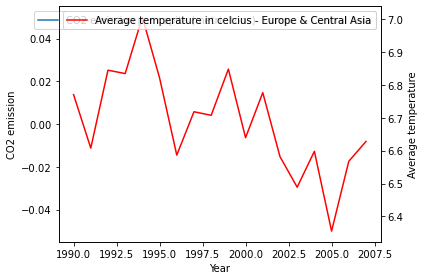

In [269]:
eca_sum = eca.describe(include='all')
#print(sa_sum)
eca_sum = eca.describe(include='all')
#print sa_sum
co2_mean=[]
temp_mean=[]
for y in range(1990,2008):
    co2_mean.append(eca_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(eca_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

year=[x for x in range(1990,2008)]
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- Europe & Central Asia")
ax1.legend(loc="best")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - Europe & Central Asia")
ax2.tick_params(axis='y')

ax2.legend(loc="best")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("CO2_vs_avg_temp_ECA.png")
plt.show()

In [ ]:
# Box plot
eca.boxplot()
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Boxplot_temp_co2_ECA.png')
plt.title('Average temperature in celsius vs CO2 emissions - Europe & Central Asia')

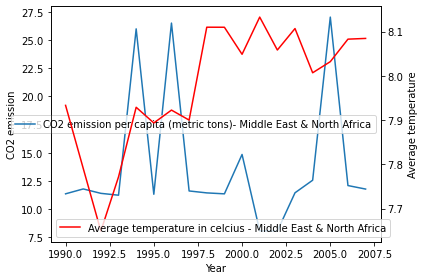

In [270]:
#Middle East & North Africa"]
mena_sum = mena.describe(include='all')
#print(mena_sum)
mena = mena.describe(include='all')
#print mena
co2_mean=[]
temp_mean=[]
for y in range(1990,2008):
    co2_mean.append(mena_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(mena_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

year=[x for x in range(1990,2008)]
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- Middle East & North Africa")
ax1.legend(loc="best")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - Middle East & North Africa")
ax2.tick_params(axis='y')

ax2.legend(loc="best")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("CO2_vs_avg_temp_MENA.png")
plt.show()

Text(0.5, 1.0, 'Average temperature in celsius vs CO2 emissions - Middle East & North Africa')

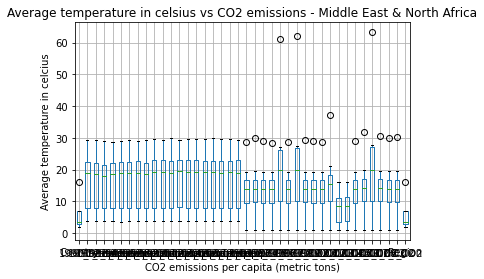

In [287]:
# Box plot
mena.boxplot()
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Boxplot_temp_co2_MENA.png')
plt.title('Average temperature in celsius vs CO2 emissions - Middle East & North Africa')

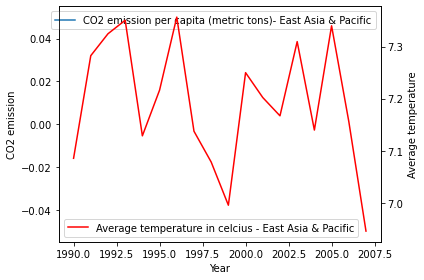

In [272]:
# East Asia & Pacific
eap_sum = eap.describe(include='all')
#print(mena_sum)
eap = eap.describe(include='all')
#print(eap)
co2_mean=[]
temp_mean=[]
for y in range(1990,2008):
    co2_mean.append(eap_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(eap_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

year=[x for x in range(1990,2008)]
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- East Asia & Pacific")
ax1.legend(loc="best")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - East Asia & Pacific")
ax2.tick_params(axis='y')

ax2.legend(loc="best")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("CO2_vs_avg_temp_EAP.png")
plt.show()

Text(0.5, 1.0, 'Average temperature in celsius vs CO2 emissions - East Asia & Pacific')

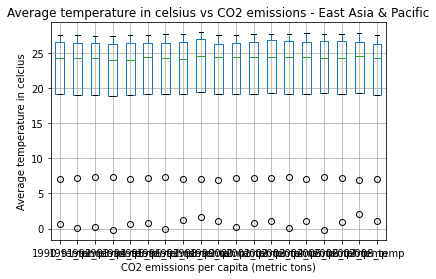

In [279]:
# Box plot
eap.boxplot()
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Boxplot_temp_co2_EAP.png')
plt.title('Average temperature in celsius vs CO2 emissions - East Asia & Pacific')

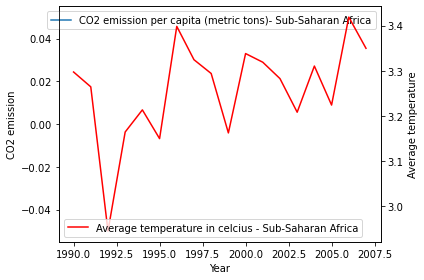

In [273]:
#Sub-Saharan Africa
ssa_sum = ssa.describe(include='all')
#print(mena_sum)
ssa = ssa.describe(include='all')
#print(eap)
co2_mean=[]
temp_mean=[]
for y in range(1990,2008):
    co2_mean.append(ssa_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(ssa_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

year=[x for x in range(1990,2008)]
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- Sub-Saharan Africa")
ax1.legend(loc="best")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - Sub-Saharan Africa")
ax2.tick_params(axis='y')

ax2.legend(loc="best")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("CO2_vs_avg_temp_SSA.png")
plt.show()

Text(0.5, 1.0, 'Average temperature in celsius vs CO2 emissions - Sub-Saharan Africa')

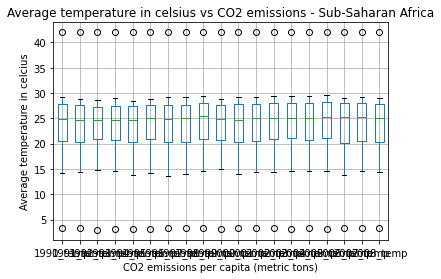

In [278]:
# Box plot
ssa.boxplot()
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Boxplot_temp_co2_SSA.png')
plt.title('Average temperature in celsius vs CO2 emissions - Sub-Saharan Africa')

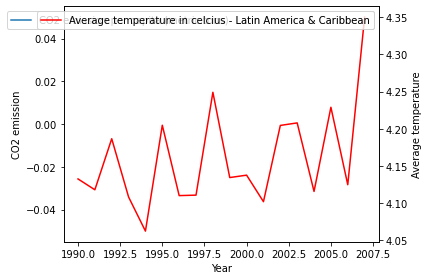

In [274]:
#Latin America & Caribbean
lac_sum = lac.describe(include='all')
#print(mena_sum)
lac = lac.describe(include='all')
#print(eap)
co2_mean=[]
temp_mean=[]
for y in range(1990,2008):
    co2_mean.append(lac_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(lac_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

year=[x for x in range(1990,2008)]
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- Latin America & Caribbean")
ax1.legend(loc="best")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - Latin America & Caribbean")
ax2.tick_params(axis='y')

ax2.legend(loc="best")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("CO2_vs_avg_temp_LAC.png")
plt.show()

Text(0.5, 1.0, 'Average temperature in celsius vs CO2 emissions - Latin America & Caribbean')

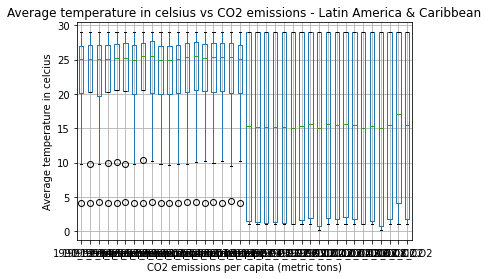

In [281]:
# Box plot
lac.boxplot()
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Boxplot_temp_co2_lac.png')
plt.title('Average temperature in celsius vs CO2 emissions - Latin America & Caribbean')

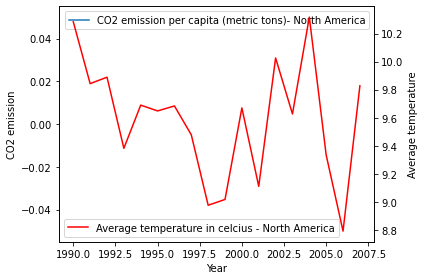

In [275]:
#North America
na_sum = na.describe(include='all')
#print(mena_sum)
na = na.describe(include='all')
#print(eap)
co2_mean=[]
temp_mean=[]
for y in range(1990,2008):
    co2_mean.append(na_sum.iloc[5][f"{y}_CO2"]) #adding mean for all CO2 columns to list
    temp_mean.append(na_sum.iloc[5][f"{y}_temp"]) #adding mean for all temp columns to list

year=[x for x in range(1990,2008)]
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 emission")
ax1.plot(year,co2_mean,label="CO2 emission per capita (metric tons)- North America")
ax1.legend(loc="best")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Average temperature')  # we already handled the x-label with ax1
ax2.plot(year, temp_mean,color="r",label="Average temperature in celcius - North America")
ax2.tick_params(axis='y')

ax2.legend(loc="best")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("CO2_vs_avg_temp_NA.png")
plt.show()

Text(0.5, 1.0, 'Average temperature in celsius vs CO2 emissions - North America')

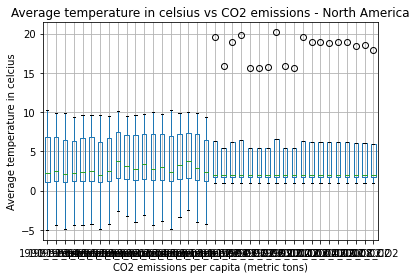

In [282]:
# Box plot
na.boxplot()
plt.xlabel("CO2 emissions per capita (metric tons)")
plt.ylabel('Average temperature in celcius')
plt.savefig('Boxplot_temp_co2_na.png')
plt.title('Average temperature in celsius vs CO2 emissions - North America')

### Is there a correlation between a country’s wealth (GDP per Capita) and its yearly average CO2 emissions? 
* Null hypothesis: Wealth of a country does not affect CO2 emissions. 
* Alternative hypothesis: The wealthier a country, the more CO2 they emit.

### Is there a correlation between global average temperature and global population? (population value to be taken at the end of each year)
* Null hypothesis: There is no correlation between global yearly average temp and global population.
* Alternative hypothesis: There is a positive correlation between global yearly average temp and global population.

Does this correlation (population vs temperature) exist in individual countries, or does this vary depending on location? Perfectly sets us up for the next 2Q’s

### Is there a correlation between a specific country’s CO2 levels and Temperature vs happiness Index? 
* Null hypothesis: There is no correlation between CO2 levels/Temperature and happiness index
* Alternative hypothesis: As CO2 levels/Temperature increases, citizens of a country is less happy 

### Is there a correlation between a country’s yearly average CO2 levels and life expectancy? Does a country’s CO2 level affect the life expectancy of a population?
* Null hypothesis: There is no correlation between a country’s yearly average CO2 level
* Alternative hypothesis: As CO2 levels increase, a population’s life expectancy decreases.